In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

from statsmodels.distributions.empirical_distribution import ECDF

from IPython.display import display

from my_criterions import *
from my_statistics import *

In [20]:
def load_distributions_indep(filename: str):
    both = pd.read_csv(filename, names=['x', 'dist'], sep=' ')
    d1 = both[both['dist'] == 0]
    d2 = both[both['dist'] == 1]
    d1 = d1.drop(columns='dist').values
    d2 = d2.drop(columns='dist').reset_index(drop=True).values
    return (d1, d2)

def load_distributions_dep(filename: str):
    both = pd.read_csv(filename, names=['x', 'y'], sep=' ')
    d1 = both['x'].values
    d2 = both['y'].values
    return (d1, d2)

Небольшой тест по примерам из лекций

(True, -0.16903085094570333, 1.959963984540054)


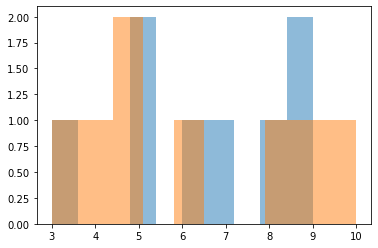

(True, -0.28571428571428575, 1.959963984540054)


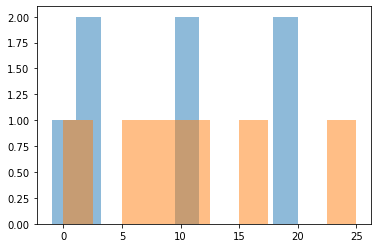

In [3]:
x = np.array([3, 9, 5, 8, 5, 6, 9, 7])
y = np.array([5, 4, 5, 9, 6, 10, 3, 8])
print(WilcoxonSignedRanksTest(x, y))
plt.hist(x,alpha=0.5)
plt.hist(y,alpha=0.5)
plt.show()

x = np.array([10, 3, 18, -1, 20, 10, 3])
y = np.array([15, 7, 0, 10, 25, 9])
print(MannWhitneyTest(x, y))
plt.hist(x,alpha=0.5)
plt.hist(y,alpha=0.5)
plt.show()

In [21]:
dist1, dist2 = load_distributions_indep('data_lab3/dep/norm!=1.txt')
len(dist1), len(dist2)

(300, 300)

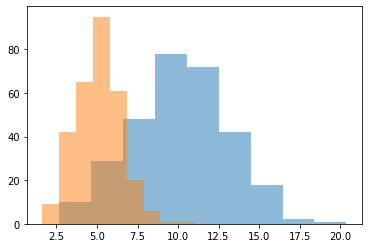

In [22]:
bins = 9
plt.hist(dist1, alpha=0.5, bins=bins)
plt.hist(dist2, alpha=0.5, bins=bins)
plt.show()

In [24]:
print("Variance equality:", variance_equality(dist1, dist2))
print("Mean equality:", mean_equality_dep(dist1, dist2))

Variance equality: (False, 4.734445461528675, 1.2099167425932442)
Mean equality: (False, 25.756987223784446, 1.9679296690653618)


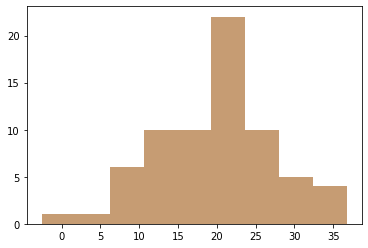

In [18]:
d1, d2 = load_distributions_dep("data_lab3/indep/norm=6.txt")
bins = 9
plt.hist(d1, alpha=0.5, bins=bins)
plt.hist(d2, alpha=0.5, bins=bins)
plt.show()

In [19]:
print("Variance equality:", variance_equality(d1, d2))
print("Mean equality:", mean_equality_dep(d1, d2))
print("Wilcoxon test", WilcoxonSignedRanksTest(d1, d2))

Variance equality: (True, 1.0, 1.4944206985086363)
Mean equality: (True, 0.0, 1.9954689309194018)
Wilcoxon test (True, 0.0, 1.959963984540054)


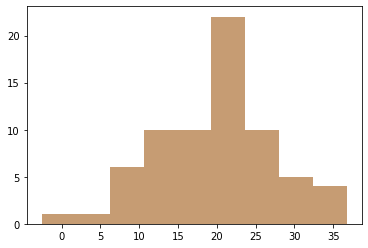

In [25]:
d1, d2 = load_distributions_indep("data_lab3/dep/norm=6.txt")
bins = 9
plt.hist(d1, alpha=0.5, bins=bins)
plt.hist(d2, alpha=0.5, bins=bins)
plt.show()

In [12]:
print("Variance equality:", variance_equality(d1, d2))
print("Mean equality:", mean_equality_indep(d1, d2))
print("Mann-Whitney test", MannWhitneyTest(d1, d2))

Variance equality: (True, 1.0, 1.4944206985086363)
Mean equality: (True, 0.0, 1.9775607765430832)
Mann-Whitney test (True, 0.0, 1.959963984540054)


# Задача 1
<p>У файлі readingspeed.txt міститься інформація щодо швидкості читання у дітей залежно від
методики, за якою їх навчали (DRA – direct reading activities, SC – standart curriculum). Потрібно
перевірити, чи різниться швидкість читання у разі навчання за цими методиками.</p>
<p>1. Вибірки є незалежними, оскільки у вимірах приймають участі різні діти і використовуються різні методики.</p>

<p>2. Якщо вибірки незалежні:</p>
<p>– перевірити, чи нормально розподілені дані кожної вибірки, скориставшись
лабораторною роботою 1;</p>
<p>– для кожної вибірки проаналізувати середнє та 95% довірчий інтервал для нього;
якщо хоча б одна з вибірок розподілена не за нормальним законом, то поряд із середнім
проаналізувати медіану та 95% довірчий інтервал для неї;</p>
</p>– застосувати для розв’язання задачі параметричний або ранговий критерій в
залежності від результатів перевірки на нормальність.</p>

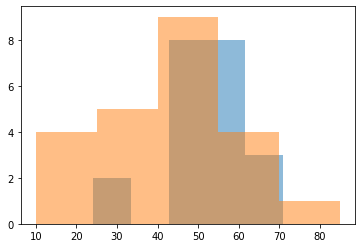

Is first normal: True
Is second normal: True
First mean: 51.476190476190474 confidence interval: (46.46570171119898, 56.48667924118197)
second mean: 41.52173913043478 confidence interval: (34.1060707899468, 48.937407470922764)


In [2]:
df = pd.read_csv("data_lab3_tasks/readingspeed.txt", sep=' ')
d1 = df[df["LearningType"] == "DRA"].drop(columns="LearningType")["Score"].values
d2 = df[df["LearningType"] == "SC"].drop(columns="LearningType").reset_index(drop=True)['Score'].values
plt.hist(d1, alpha=0.5, bins=5)
plt.hist(d2, alpha=0.5, bins=5)
plt.show()
print("Is first normal:", myNormalTest(d1))
print("Is second normal:", myNormalTest(d2))

print("First mean:", Mean(d1), "confidence interval:", norm_mean_confidence_interval(d1))
print("second mean:", Mean(d2), "confidence interval:", norm_mean_confidence_interval(d2))

<p>Оскільки розподіли ідентицікуються як нормальні використаємо пареметричні критерії</p>

In [3]:
print("Variance equality:", variance_equality(d1, d2))
print("Mean equality:", mean_equality_indep(d1, d2, welch=True))

Variance equality: (False, 2.427157710678897, 2.1016033561950427)
Mean equality: (False, 2.310889197854228, 2.024648135210701)


### Вывод: в среднем, скорость чтения в первой группе выше чем во второй. Это также подтверждают критерии проверки.

# Задача 2
<p>Для 61 великого міста Англії та Уельсу відома середня річна смертність на 100 тис.
населення (за даними 1958-1964 років), а також концентрація калію у воді (в частинах на мільйон).
Чим вища концентрація калію, тим жорсткіша вода. Додатково міста поділено на південні та
північні. Дані містяться у файлі water.txt. Потрібно перевірити: 1) чи різниться середня смертність
на півночі та півдні країни, 2) чи різниться жорсткість води у північних та південних містах.</p>

Дані, відносно розташування, незалежні, оскільки відносяться до різних географічних регіонів.

In [5]:
df = pd.read_csv("data_lab3_tasks/water.txt", sep='\t')
S = df[df["location"] == "South"].drop(columns=["location", "town"])
N = df[df["location"] == "North"].drop(columns=["location", "town"])
S_mortality = S["mortality"].values
S_hardness = S["hardness"].values
N_mortality = N["mortality"].values
N_hardness = N["hardness"].values

### Mortality

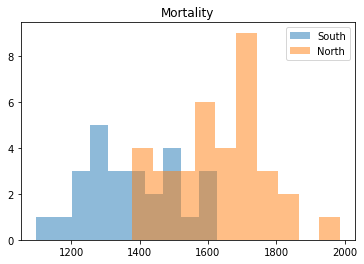

Is first normal: True
Is second normal: True
First mean: 1376.8076923076924 confidence interval: (1320.1517462936238, 1433.463638321761)
Second mean: 1633.6 confidence interval: (1586.5605251961385, 1680.6394748038613)


In [6]:
plt.hist(S_mortality, alpha=0.5, label='South')
plt.hist(N_mortality, alpha=0.5, label='North')
plt.title("Mortality")
plt.legend()
plt.show()
print("Is first normal:", myNormalTest(S_mortality))
print("Is second normal:", myNormalTest(N_mortality))
print("First mean:", Mean(S_mortality), "confidence interval:", norm_mean_confidence_interval(S_mortality))
print("Second mean:", Mean(N_mortality), "confidence interval:", norm_mean_confidence_interval(N_mortality))

Навіть без застосування критеріїв видно, що середні досить сильно відрізняються. Також іх довірчі інтервали не перетинаються.

In [7]:
print("Variance equality:", variance_equality(S_mortality, N_mortality))
print("Mean equality:", mean_equality_indep(S_mortality, N_mortality, welch=False))

Variance equality: (True, 1.0492607615360292, 1.833424568978017)
Mean equality: (False, -7.168550664340208, 2.00099537704821)


### Вывод: Средняя смертность выше на севере. Разброс одинаковый, но присутствует сдвиг.

### Water hardness

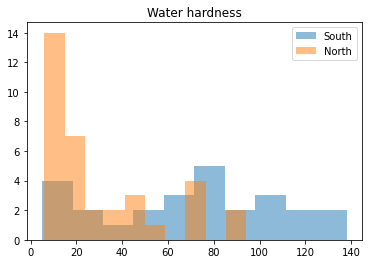

Is first normal: True
Is second normal: False
----------------------------------------------
First mean: 69.76923076923077 confidence interval: (53.467198692036106, 86.07126284642544)
Second mean: 30.4 confidence interval: (21.42248728572426, 39.37751271427574)
----------------------------------------------
First median: 75.5 confidence interval: (53, 90)
Second median: 17 confidence interval: (14, 39)


In [25]:
plt.hist(S_hardness, alpha=0.5, label='South')
plt.hist(N_hardness, alpha=0.5, label='North')
plt.title("Water hardness")
plt.legend()
plt.show()

print("Is first normal:", myNormalTest(S_hardness))
print("Is second normal:", myNormalTest(N_hardness))
print("----------------------------------------------")
print("First mean:", Mean(S_hardness), "confidence interval:", norm_mean_confidence_interval(S_hardness))
print("Second mean:", Mean(N_hardness), "confidence interval:", norm_mean_confidence_interval(N_hardness))
print("----------------------------------------------")
print("First median:", Median(S_hardness), "confidence interval:", median_conf_interval(S_hardness))
print("Second median:", Median(N_hardness), "confidence interval:", median_conf_interval(N_hardness))

In [28]:
print("Mann-Whitney test:", MannWhitneyTest(S_hardness, N_hardness))

Mann-Whitney test: (False, 3.6824381786233964, 1.959963984540054)


### Вывод: Жесткость воды в среднем выше на Юге. На юге показатель распределен скорее по равномерному закону, тогда как на севере по какому-то, которому соответствует унимодальная гистограмма (экспоненциальное, вейбулла, парето).

# Задача 3
<p>У рамках дослідження ефективності препарату «метилфенидат» 24 пацієнти із синдромом
дефіциту уваги та гіперактивності протягом тижня приймали або метилфенидат, або плацебо.
Наприкінці тижня кожен пацієнт проходив тест на здатність до пригнічення імпульсивних
поведінкових реакцій. На другому етапі плацебо та препарат мінялися, і після тижневого курсу
кожний піддослідний проходив другий тест. Результати першого та другого тестів містяться у
файлі ADHD.txt. Потрібно оцінити ефект від застосування препарату.</p>
<P>Вибірки залежні, оскільки дослідження проводяться на тих самих пацієнтах.</P>

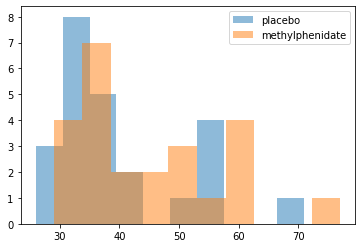

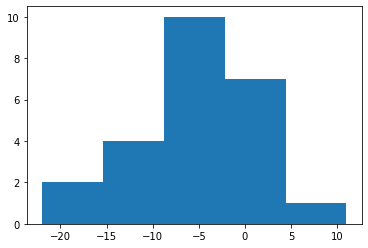

Is Difference normal: True
Difference mean: -4.958333333333333 confidence interval: (-8.14143087734743, -1.775235789319236)


In [8]:
df = pd.read_csv("data_lab3_tasks/ADHD.txt",sep=' ')
placebo = df['Placebo'].values
methylphenidate = df["Methylphenidate"].values

plt.hist(placebo, alpha=0.5, label="placebo")
plt.hist(methylphenidate, alpha=0.5, label="methylphenidate")
plt.legend()
plt.show()

diff = placebo - methylphenidate
plt.hist(diff, bins=5)
plt.show()
print("Is Difference normal:", myNormalTest(diff))

print("Difference mean:", Mean(diff), "confidence interval:", norm_mean_confidence_interval(diff))

In [58]:
print("Variance equality test:", variance_equality(placebo, methylphenidate))
print("Mean equality test:", mean_equality_dep(placebo, methylphenidate))

Variance equality test: (True, 1.1855861210165843, 2.0144248417118233)
Mean equality test: (False, -3.2223624451230406, 2.0686576104190406)


### Вывод: Разброс данных остался прежним, а среднее значение выросло, что говорит об эффективности препарата.

# Задача 4
<p>На замовлення власника заводу група експертів провела оцінку вин «Шардоне» та
«Каберне Совіньон», що випускаються цим заводом. Оцінка проводилася за 20 бальною шкалою
(чим вищий бал, тим краще вино), результати подано у файлі wines.txt. Чи можна на основі цих
оцінок вважати одне з вин кращим?</p>
<p>Вибірки залежні оскільки оцінки прив'язані до одних експертів</p>

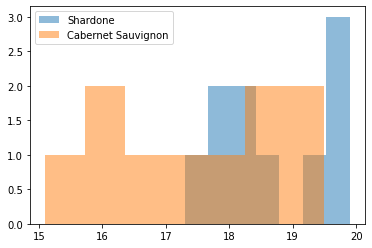

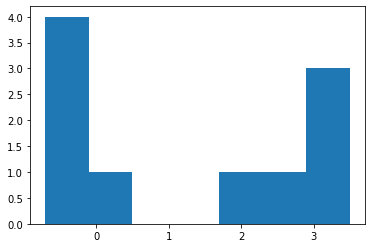

Is Difference normal: True
Difference mean: 1.1700000000000008 confidence interval: (-0.07089166658824642, 2.410891666588248)
Difference median: 1.0999999999999996 confidence interval: (-0.5999999999999979, 3.0000000000000018)


In [5]:
df = pd.read_csv("data_lab3_tasks/wines.txt", sep='\t')
shardone = df["Шардоне"].values
с_sauvignon = df["Каберне Совіньон"].values

plt.hist(shardone, alpha=0.5, label="Shardone", bins=7)
plt.hist(с_sauvignon, alpha=0.5, label="Cabernet Sauvignon", bins=7)
plt.legend()
plt.show()

diffe = shardone - с_sauvignon
plt.hist(diffe, bins=7)
plt.show()

print("Is Difference normal:", myNormalTest(diffe))
print("Difference mean:", Mean(diffe), "confidence interval:", norm_mean_confidence_interval(diffe))
print("Difference median:", Median(diffe), "confidence interval:", median_conf_interval(diffe))

Хоть критерий и говорит о нормальности распределения разниц, распределение не похоже на нормальное.

In [7]:
print("Variance equality test:", variance_equality(shardone, с_sauvignon))
print("Mean equality test:", mean_equality_dep(shardone, с_sauvignon))
print("Wilcoxon test:", WilcoxonSignedRanksTest(shardone, с_sauvignon))

Variance equality test: (True, 2.307154059597058, 3.178893104458269)
Mean equality test: (True, 2.132920988730596, 2.2621571627409915)
Wilcoxon test: (True, 1.376047416881589, 1.959963984540054)


### Вывод: по данному набору данных нельзя считать одно вино лучшим.